
📌 [Top 30 단어 - 보수 언론 (조중동) 댓글 워드클라우드]

탄핵         : 22992
국민         : 14044
대통령        : 10422
나라         : 10384
민주당        : 9543
이재명        : 9347
내란         : 8820
헌재         : 6567
대한민국       : 6492
윤석열        : 5694
사람         : 4676
계엄         : 4042
국가         : 3965
죄명         : 3580
이제         : 3555
정치         : 3487
생각         : 3406
기각         : 3196
좌파         : 3190
집회         : 3093
인간         : 3075
진짜         : 2994
지금         : 2952
반대         : 2856
재판         : 2789
보수         : 2724
세력         : 2522
선동         : 2435
국회         : 2421
자유         : 2235


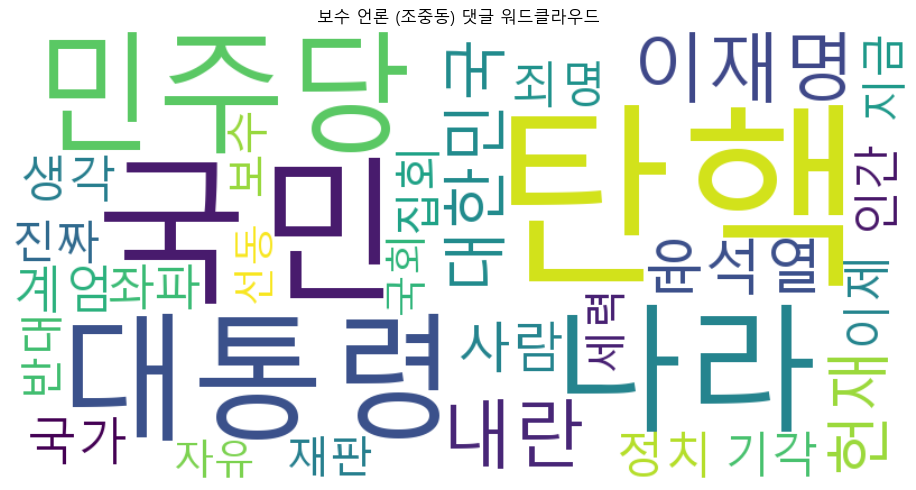


📌 [Top 30 단어 - 진보 언론 (한JTMC) 댓글 워드클라우드]

국민         : 13868
내란         : 12488
탄핵         : 11525
대통령        : 8206
나라         : 7203
윤석열        : 7064
헌재         : 5421
사람         : 5283
계엄         : 4913
인간         : 4611
대한민국       : 4110
진짜         : 4041
생각         : 3786
민주당        : 3607
이재명        : 3041
사형         : 2990
선동         : 2845
정신         : 2802
이제         : 2764
국가         : 2758
국힘         : 2629
지금         : 2556
정치         : 2556
파면         : 2549
소리         : 2322
그냥         : 2222
극우         : 2106
헌법         : 1982
기각         : 1977
국회         : 1917


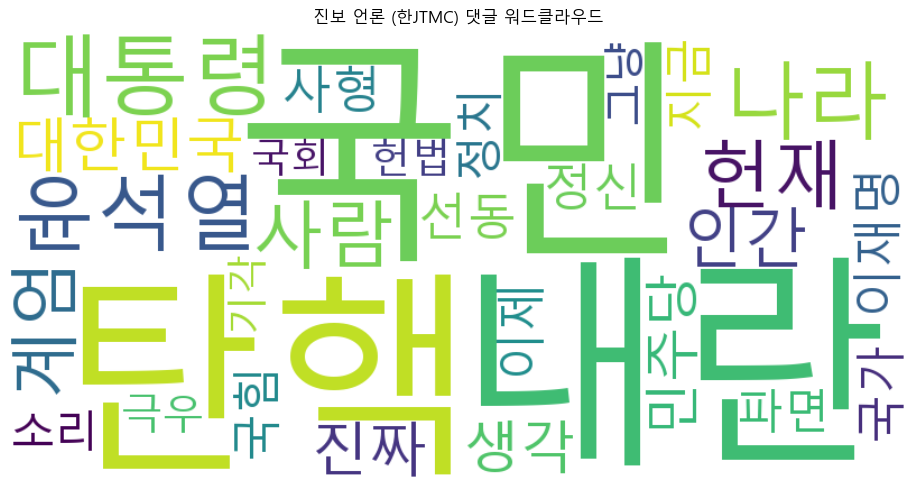


📌 [Top 30 단어 - 기타 언론 댓글 워드클라우드]

탄핵         : 68044
국민         : 50906
대통령        : 36682
내란         : 34857
나라         : 29562
민주당        : 25110
윤석열        : 23003
헌재         : 21978
사람         : 20453
이재명        : 19800
계엄         : 18161
대한민국       : 17625
생각         : 13769
국가         : 13001
정치         : 12924
인간         : 11629
진짜         : 11463
지금         : 11129
반대         : 10621
기각         : 9969
집회         : 9847
이제         : 9649
국회         : 9643
선동         : 9248
재판         : 8984
그냥         : 8902
좌파         : 8848
정신         : 8543
헌법         : 8526
국힘         : 8320


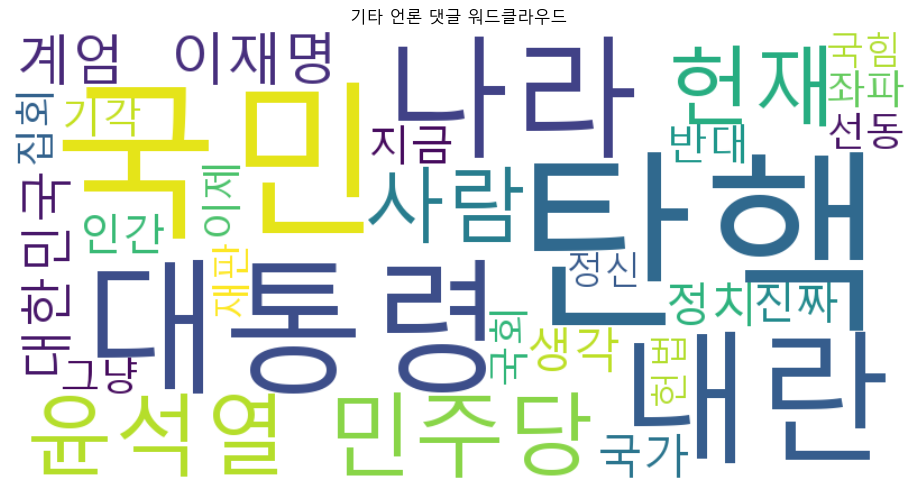

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from collections import defaultdict, Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

# 형태소 분석기
okt = Okt()

# 불용어
stopwords = set([
    '그리고', '그러나', '하지만', '또한', '있다', '없다', '이다', '이', '가', '은', '는',
    '을', '를', '에', '의', '도', '로', '과', '와', '한', '하다', '것', '수', '들',
    '좀', '잘', '너무', '더', '만', '까지', '처럼', '에서', '부터', '되다'
])

# 전처리 함수 (명사 추출 + 불용어 제거)
def clean_text(text):
    tokens = okt.nouns(text)
    return ' '.join([word for word in tokens if word not in stopwords and len(word) > 1])

# 설정
base_dir = r'C:\Users\bigba\Lecture\2025_1\Data_Analysis\Padebun\dataset'
font_path = r'C:\Windows\Fonts\malgun.ttf'  # 한글 폰트 경로
# 한글 폰트 깨짐을 위한 해결
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 워드클라우드 그리는 함수
def draw_wordcloud(text, title, top_n=30):
    word_list = text.split()
    word_counts = Counter(word_list)
    most_common = word_counts.most_common(top_n)

    print(f"\n📌 [Top {top_n} 단어 - {title}]\n")
    for word, count in most_common:
        print(f"{word:<10} : {count}")

    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(dict(most_common))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# === 그룹 정의 ===
group_a = {'조선일보', '중앙일보', '동아일보'}
group_b = {'한겨레', 'JTBC', 'MBC'}

# 댓글 저장할 dict
group_comments = {
    '보수 언론 (조중동)': [],
    '진보 언론 (한JTMC)': [],
    '기타 언론': []
}

# === 그룹별로 댓글 수집 ===
for press in os.listdir(base_dir):
    press_path = os.path.join(base_dir, press)
    if not os.path.isdir(press_path):
        continue

    # 언론사 그룹 분류
    if press in group_a:
        group_key = '보수 언론 (조중동)'
    elif press in group_b:
        group_key = '진보 언론 (한JTMC)'
    else:
        group_key = '기타 언론'

    for file_name in os.listdir(press_path):
        if not file_name.endswith('.csv'):
            continue

        # 날짜 기준 필터: 12월 ~ 4월만
        try:
            date_str = file_name.split('_')[0]  # YYYY-MM-DD
            year, month = map(int, date_str.split('-')[:2])
            if (year == 2023 and month < 12) or (year == 2025 and month > 4):
                continue  # 범위 밖이면 건너뜀
        except Exception as e:
            print(f"❌ 날짜 파싱 실패: {file_name} ({e})")
            continue

        file_path = os.path.join(press_path, file_name)

        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f"❌ 파일 열기 실패: {file_path} ({e})")
            continue

        if 'comments' not in df.columns:
            continue

        # 전처리
        comments = df['comments'].dropna().astype(str).apply(clean_text).tolist()
        group_comments[group_key].extend(comments)

# === 그룹별 워드클라우드 시각화 ===
for group_name, comments in group_comments.items():
    if comments:
        all_text = ' '.join(comments)
        draw_wordcloud(all_text, f"{group_name} 댓글 워드클라우드", top_n=30)
    else:
        print(f"⚠️ {group_name}에 댓글이 없습니다.")